In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
supported_models = [
    'Mistral-7B-Instruct-v0.2',
    'Mixtral-8x7B-Instruct-v0.1',
    'Llama-2-13b-chat-hf',
    'Llama-2-70b-chat-hf',
    'gpt-3.5-turbo-1106',
]

topics = ['high_school_mathematics',
          'high_school_physics',
          'high_school_chemistry',]



In [8]:
model = supported_models[0]
topic = topics[0]
exp = f'elo_rating/mmlu/{topic}/{model}/ratings.csv'

df = pd.read_csv(exp)

df

,evaluator,card_format,iterative_method,epoch,rating
0,claude,dict,prog-reg,4,388.718073
1,gpt,dict,one-pass,0,398.883721
2,gpt,dict,prog-reg,4,412.398206


In [46]:
def plot_all(models, topics):
    no_model = len(models)
    no_topics = len(topics)
    # row is topic, column is model
    fig, axs = plt.subplots(no_topics, no_model, figsize=(15, 10))
    
    # Add model names at the top of each column
    # for j, model in enumerate(models):
        # fig.text(0.5 + j / no_model, 0.95, model, ha='center', va='center', fontsize=12)
    
    for i, topic in enumerate(topics):
        # Add topic names to the left of each row
        axs[i, 0].set_ylabel(topic, fontsize=12)
        
        for j, model in enumerate(models):
            ax = axs[i, j]
            exp = f'elo_rating/mmlu/{topic}/{model}/ratings.csv'
            # if dne, skip this
            try:
                df = pd.read_csv(exp)
            except:
                continue
            # each row's name = 'evaluator' + 'iterative_method' + 'epoch'
            df['name'] = df['evaluator'] + '_' + df['iterative_method'] + '_epoch_' + df['epoch'].astype(str)
            # bar plot of name vs. rating
            # if name includes prog-reg_epoch_4, then set it bar to orange
            df['color'] = df['name'].apply(lambda x: 'orange' if 'prog-reg_epoch_4' in x else 'blue')
            # use ax.bar
            ax.bar(df['name'], df['rating'], color=df['color'])
            # only if first topic:
            
            if topic == topics[0]:
                ax.set_title(model)

            # set x lim to -50, + 50 of min, max
            ax.set_ylim(df['rating'].min() - 50, df['rating'].max() + 50)
            # change x label to be more readable by rotating 45 degrees
            ax.set_xticklabels(df['name'], rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the top spacing for model names
    plt.show()

/var/folders/78/7hfmr44j5njd1jd6sv9j23dc0000gn/T/ipykernel_36189/3533031759.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['name'], rotation=45)
/var/folders/78/7hfmr44j5njd1jd6sv9j23dc0000gn/T/ipykernel_36189/3533031759.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['name'], rotation=45)
/var/folders/78/7hfmr44j5njd1jd6sv9j23dc0000gn/T/ipykernel_36189/3533031759.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['name'], rotation=45)
/var/folders/78/7hfmr44j5njd1jd6sv9j23dc0000gn/T/ipykernel_36189/3533031759.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['name'], rotation=45)
/var/folders/78/7hfmr44j5njd1jd6sv9j23dc0000gn/T/ipykernel_36189/3533031759.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['n

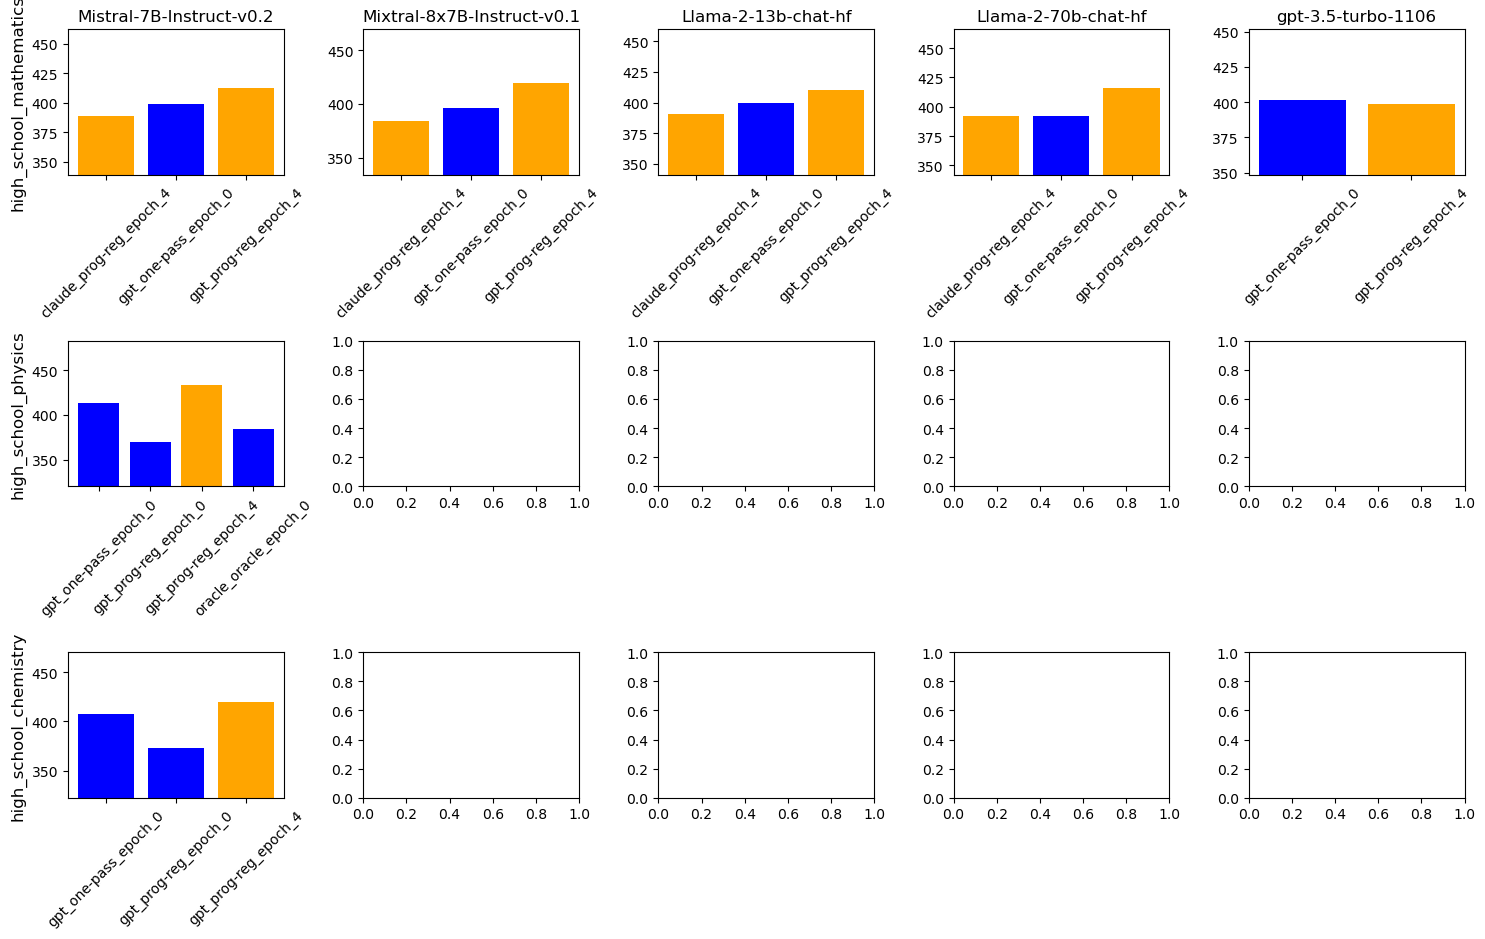

In [47]:
plot_all(supported_models, topics)